In [2]:
#WeatherPy Data Analysis
#1. The hottest max temperatures at this time of year lie between -20 and 20 degrees latitude. The data follows a preditable pattern based on geography, and there doesn't appear to be any anomalies.
#2. Humidity % is consistently between 80-100% at zero degrees latitude. All other latitudes have anomalies that make it difficult to convinvingly connect humidity % to latitude. Including longitude in addition to latitude would tell us more about areas with high humidity on this day in September.
#3. There is no clear correlation between cloudiness and latitude, at least on 9/26/18. Cloudiness % varies greatly in areas of similar latitude.

In [3]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
from config import api_key


# Incorporated citipy to determine city based on latitude and longitude
from citipy import citipy

# Output File (CSV)
output_data_file = "cities.csv"

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

## Generate Cities List

In [4]:
# List for holding lat_lngs and cities
lat_lngs = []
cities = []

# Create a set of random lat and lng combinations
lats = np.random.uniform(low=-90.000, high=90.000, size=1500)
lngs = np.random.uniform(low=-180.000, high=180.000, size=1500)
lat_lngs = zip(lats, lngs)


# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
len(cities)

598

## Perform API Calls

In [5]:

# Starting URL for Weather Map API Call
url = "http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=" + api_key 
query_url = f"{url}&q="
query_url


'http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=5af051bf1c84d1e8c82a67ab3cea456b&q='

In [6]:
humidity = []
temp = []
cloudiness = []
lat = []
wind_speed = []
city_new = []
citycount = 1 
setcount = 1
# Loop through the list of cities and perform a request for data on each
for city in cities:
    if citycount % 50 == 0:
        setcount = setcount + 1
        citycount = 0
    print(f' Record {citycount} of Set {setcount} | {city}')
    print(f'{query_url + city}')
    citycount = citycount + 1

    try:
        response = requests.get(query_url + city).json()
        humidity.append(response['main']['humidity'])
        temp.append(response['main']['temp_max'])
        cloudiness.append(response['clouds']['all'])
        wind_speed.append(response['wind']['speed'])
        lat.append(response['coord']['lat'])
        city_new.append(response['name'])
    except: KeyError


 Record 1 of Set 1 | ulladulla
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=5af051bf1c84d1e8c82a67ab3cea456b&q=ulladulla
 Record 2 of Set 1 | rikitea
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=5af051bf1c84d1e8c82a67ab3cea456b&q=rikitea
 Record 3 of Set 1 | port alfred
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=5af051bf1c84d1e8c82a67ab3cea456b&q=port alfred
 Record 4 of Set 1 | avarua
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=5af051bf1c84d1e8c82a67ab3cea456b&q=avarua
 Record 5 of Set 1 | busselton
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=5af051bf1c84d1e8c82a67ab3cea456b&q=busselton
 Record 6 of Set 1 | vestmanna
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=5af051bf1c84d1e8c82a67ab3cea456b&q=vestmanna
 Record 7 of Set 1 | albany
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=5af051bf1c84d1e8c82a67ab3cea456b&q=albany
 Rec

 Record 9 of Set 2 | belushya guba
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=5af051bf1c84d1e8c82a67ab3cea456b&q=belushya guba
 Record 10 of Set 2 | kruisfontein
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=5af051bf1c84d1e8c82a67ab3cea456b&q=kruisfontein
 Record 11 of Set 2 | lavrentiya
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=5af051bf1c84d1e8c82a67ab3cea456b&q=lavrentiya
 Record 12 of Set 2 | sola
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=5af051bf1c84d1e8c82a67ab3cea456b&q=sola
 Record 13 of Set 2 | ugoofaaru
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=5af051bf1c84d1e8c82a67ab3cea456b&q=ugoofaaru
 Record 14 of Set 2 | nouadhibou
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=5af051bf1c84d1e8c82a67ab3cea456b&q=nouadhibou
 Record 15 of Set 2 | bethel
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=5af051bf1c84d1e8c82a67ab3c

 Record 16 of Set 3 | rauma
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=5af051bf1c84d1e8c82a67ab3cea456b&q=rauma
 Record 17 of Set 3 | ozernovskiy
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=5af051bf1c84d1e8c82a67ab3cea456b&q=ozernovskiy
 Record 18 of Set 3 | saldanha
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=5af051bf1c84d1e8c82a67ab3cea456b&q=saldanha
 Record 19 of Set 3 | tevriz
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=5af051bf1c84d1e8c82a67ab3cea456b&q=tevriz
 Record 20 of Set 3 | pierre
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=5af051bf1c84d1e8c82a67ab3cea456b&q=pierre
 Record 21 of Set 3 | vaini
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=5af051bf1c84d1e8c82a67ab3cea456b&q=vaini
 Record 22 of Set 3 | saleaula
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=5af051bf1c84d1e8c82a67ab3cea456b&q=saleaula
 Record 23 of

 Record 24 of Set 4 | upernavik
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=5af051bf1c84d1e8c82a67ab3cea456b&q=upernavik
 Record 25 of Set 4 | buala
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=5af051bf1c84d1e8c82a67ab3cea456b&q=buala
 Record 26 of Set 4 | fairbanks
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=5af051bf1c84d1e8c82a67ab3cea456b&q=fairbanks
 Record 27 of Set 4 | laguna
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=5af051bf1c84d1e8c82a67ab3cea456b&q=laguna
 Record 28 of Set 4 | broome
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=5af051bf1c84d1e8c82a67ab3cea456b&q=broome
 Record 29 of Set 4 | sept-iles
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=5af051bf1c84d1e8c82a67ab3cea456b&q=sept-iles
 Record 30 of Set 4 | san patricio
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=5af051bf1c84d1e8c82a67ab3cea456b&q=san patricio

 Record 31 of Set 5 | eureka
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=5af051bf1c84d1e8c82a67ab3cea456b&q=eureka
 Record 32 of Set 5 | saint-augustin
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=5af051bf1c84d1e8c82a67ab3cea456b&q=saint-augustin
 Record 33 of Set 5 | tiksi
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=5af051bf1c84d1e8c82a67ab3cea456b&q=tiksi
 Record 34 of Set 5 | katsuura
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=5af051bf1c84d1e8c82a67ab3cea456b&q=katsuura
 Record 35 of Set 5 | wuda
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=5af051bf1c84d1e8c82a67ab3cea456b&q=wuda
 Record 36 of Set 5 | chagda
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=5af051bf1c84d1e8c82a67ab3cea456b&q=chagda
 Record 37 of Set 5 | leningradskiy
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=5af051bf1c84d1e8c82a67ab3cea456b&q=leningradskiy

 Record 40 of Set 6 | port hedland
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=5af051bf1c84d1e8c82a67ab3cea456b&q=port hedland
 Record 41 of Set 6 | konin
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=5af051bf1c84d1e8c82a67ab3cea456b&q=konin
 Record 42 of Set 6 | broken hill
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=5af051bf1c84d1e8c82a67ab3cea456b&q=broken hill
 Record 43 of Set 6 | sataua
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=5af051bf1c84d1e8c82a67ab3cea456b&q=sataua
 Record 44 of Set 6 | hofn
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=5af051bf1c84d1e8c82a67ab3cea456b&q=hofn
 Record 45 of Set 6 | gimli
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=5af051bf1c84d1e8c82a67ab3cea456b&q=gimli
 Record 46 of Set 6 | paamiut
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=5af051bf1c84d1e8c82a67ab3cea456b&q=paamiut
 Record 47 

 Record 47 of Set 7 | sentyabrskiy
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=5af051bf1c84d1e8c82a67ab3cea456b&q=sentyabrskiy
 Record 48 of Set 7 | mackay
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=5af051bf1c84d1e8c82a67ab3cea456b&q=mackay
 Record 49 of Set 7 | kachiry
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=5af051bf1c84d1e8c82a67ab3cea456b&q=kachiry
 Record 0 of Set 8 | agadir
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=5af051bf1c84d1e8c82a67ab3cea456b&q=agadir
 Record 1 of Set 8 | kirkwall
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=5af051bf1c84d1e8c82a67ab3cea456b&q=kirkwall
 Record 2 of Set 8 | alice springs
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=5af051bf1c84d1e8c82a67ab3cea456b&q=alice springs
 Record 3 of Set 8 | stromness
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=5af051bf1c84d1e8c82a67ab3cea456b&q=str

 Record 4 of Set 9 | tarancon
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=5af051bf1c84d1e8c82a67ab3cea456b&q=tarancon
 Record 5 of Set 9 | chadan
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=5af051bf1c84d1e8c82a67ab3cea456b&q=chadan
 Record 6 of Set 9 | nisia floresta
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=5af051bf1c84d1e8c82a67ab3cea456b&q=nisia floresta
 Record 7 of Set 9 | chutove
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=5af051bf1c84d1e8c82a67ab3cea456b&q=chutove
 Record 8 of Set 9 | acajutla
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=5af051bf1c84d1e8c82a67ab3cea456b&q=acajutla
 Record 9 of Set 9 | shitanjing
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=5af051bf1c84d1e8c82a67ab3cea456b&q=shitanjing
 Record 10 of Set 9 | norman wells
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=5af051bf1c84d1e8c82a67ab3cea456b&q=

 Record 12 of Set 10 | seymchan
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=5af051bf1c84d1e8c82a67ab3cea456b&q=seymchan
 Record 13 of Set 10 | codrington
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=5af051bf1c84d1e8c82a67ab3cea456b&q=codrington
 Record 14 of Set 10 | sahrak
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=5af051bf1c84d1e8c82a67ab3cea456b&q=sahrak
 Record 15 of Set 10 | port lincoln
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=5af051bf1c84d1e8c82a67ab3cea456b&q=port lincoln
 Record 16 of Set 10 | matara
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=5af051bf1c84d1e8c82a67ab3cea456b&q=matara
 Record 17 of Set 10 | divnomorskoye
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=5af051bf1c84d1e8c82a67ab3cea456b&q=divnomorskoye
 Record 18 of Set 10 | carlisle
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=5af051bf1c84d1e8c82a67

 Record 19 of Set 11 | cabuyaro
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=5af051bf1c84d1e8c82a67ab3cea456b&q=cabuyaro
 Record 20 of Set 11 | kaseda
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=5af051bf1c84d1e8c82a67ab3cea456b&q=kaseda
 Record 21 of Set 11 | santa cruz
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=5af051bf1c84d1e8c82a67ab3cea456b&q=santa cruz
 Record 22 of Set 11 | islampur
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=5af051bf1c84d1e8c82a67ab3cea456b&q=islampur
 Record 23 of Set 11 | lorengau
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=5af051bf1c84d1e8c82a67ab3cea456b&q=lorengau
 Record 24 of Set 11 | tsogni
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=5af051bf1c84d1e8c82a67ab3cea456b&q=tsogni
 Record 25 of Set 11 | shizunai
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=5af051bf1c84d1e8c82a67ab3cea456b&q=shizu

 Record 27 of Set 12 | maragogi
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=5af051bf1c84d1e8c82a67ab3cea456b&q=maragogi
 Record 28 of Set 12 | rohtak
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=5af051bf1c84d1e8c82a67ab3cea456b&q=rohtak
 Record 29 of Set 12 | aybak
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=5af051bf1c84d1e8c82a67ab3cea456b&q=aybak
 Record 30 of Set 12 | itarema
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=5af051bf1c84d1e8c82a67ab3cea456b&q=itarema
 Record 31 of Set 12 | meadow lake
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=5af051bf1c84d1e8c82a67ab3cea456b&q=meadow lake
 Record 32 of Set 12 | svetlyy
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=5af051bf1c84d1e8c82a67ab3cea456b&q=svetlyy
 Record 33 of Set 12 | scarborough
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=5af051bf1c84d1e8c82a67ab3cea456b&q=scarbo

In [10]:
weather_dict = {
    "city": city_new,
    "latitude": lat,
    "max temperature": temp,
    "humidity": humidity,
    "cloudiness": cloudiness,
    "wind speed": wind_speed
}
weather_data = pd.DataFrame(weather_dict)
weather_data.count()
weather_data.to_csv('cities.csv', index=False)

In [11]:
weather_data.head()

city  latitude  max temperature  humidity  cloudiness  wind speed
0    Ulladulla    -35.36            68.00        42           0        9.17
1      Rikitea    -23.12            70.89       100          88       21.52
2  Port Alfred    -33.59            62.79        94           0       13.80
3       Avarua    -21.21            80.60        74          75        5.82
4    Busselton    -33.64            60.09       100          44       10.45

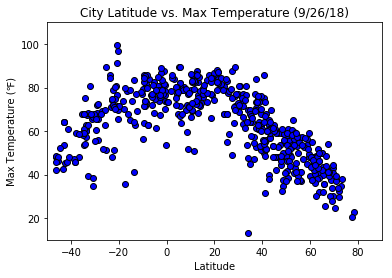

In [12]:
plt.scatter(lat, temp, marker="o", facecolors="blue", edgecolors="black")
plt.xlabel("Latitude")
plt.ylabel("Max Temperature (â„‰)")
plt.title("City Latitude vs. Max Temperature (9/26/18)")
plt.ylim(10,110)
plt.xlim(-50,90)
plt.savefig("lat_vs_maxtemp.png")
plt.show()

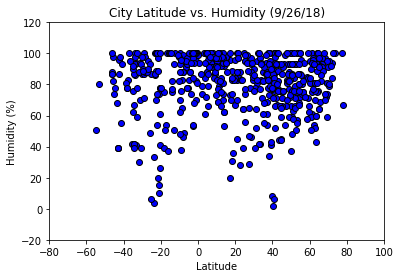

In [13]:
plt.scatter(lat, humidity, marker="o", facecolors="blue", edgecolors="black")
plt.ylim(-20,120)
plt.xlim(-80,100)
plt.xlabel("Latitude")
plt.ylabel("Humidity (%)")
plt.title("City Latitude vs. Humidity (9/26/18)")
plt.savefig("lat_vs_humidity.png")
plt.show()

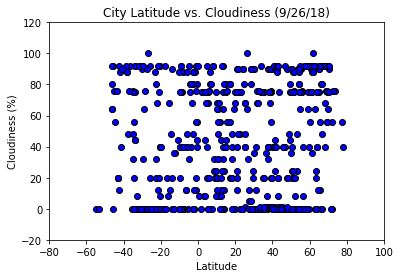

In [14]:
plt.scatter(lat, cloudiness, marker="o", facecolors="blue", edgecolors="black")
plt.ylim(-20,120)
plt.xlim(-80,100)
plt.xlabel("Latitude")
plt.ylabel("Cloudiness (%)")
plt.title("City Latitude vs. Cloudiness (9/26/18)")
plt.savefig("lat_vs_cloudiness.png")
plt.show()